In [1]:
import logging

logging.basicConfig(level=logging.DEBUG)
import matplotlib.pyplot as plt
logging.getLogger("matplotlib").setLevel(logging.WARNING)
import pandas as pd
import xarray as xr

%matplotlib inline

DEBUG:matplotlib:matplotlib data path: /home/jambyr/miniconda3/envs/icenet4/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/jambyr/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/jambyr/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/jambyr/.cache/matplotlib/fontlist-v390.json


In [2]:
from download_toolbox.interface import get_dataset_config_implementation

In [3]:
ds_config = get_dataset_config_implementation("data/osisaf/dataset_config.month.hemi.north.json")
ds = ds_config.get_dataset(["siconca"])

DEBUG:root:Retrieving implementations details from data/osisaf/dataset_config.month.hemi.north.json
DEBUG:root:Loaded configuration data,history,implementation
INFO:root:Attempting to instantiate download_toolbox.data.osisaf:SICDatasetConfig with loaded configuration
DEBUG:root:Converted kwargs from the retrieved configuration: location,identifier,base_path,path_components,levels,var_files,var_names,invalid_dates,frequency,output_group_by
DEBUG:root:./data/osisaf/month/hemi.north already exists
DEBUG:root:Finding files for siconca
INFO:root:Got 6 filenames to open dataset with!
DEBUG:root:['./data/osisaf/month/hemi.north/siconca/1988.nc',
 './data/osisaf/month/hemi.north/siconca/1985.nc',
 './data/osisaf/month/hemi.north/siconca/1983.nc',
 './data/osisaf/month/hemi.north/siconca/1986.nc',
 './data/osisaf/month/hemi.north/siconca/1984.nc',
 './data/osisaf/month/hemi.north/siconca/1987.nc']
DEBUG:rasterio.session:Could not import boto3, continuing with reduced functionality.
DEBUG:raster

In [25]:
ds_config

{'_base_path': './data',
 '_config': None,
 '_config_type': 'dataset_config',
 '_frequency': <Frequency.MONTH: 2>,
 '_identifier': 'osisaf',
 '_invalid_dates': [datetime.date(1978, 10, 30),
                    datetime.date(1986, 4, 30),
                    datetime.date(1986, 5, 31),
                    datetime.date(1986, 6, 30),
                    datetime.date(1987, 12, 31)],
 '_levels': [None],
 '_location': Location(name='hemi.north', bounds=[90, -180, 0, 180], north=True, south=False),
 '_output_group_by': <Frequency.YEAR: 1>,
 '_overwrite': False,
 '_path': './data/osisaf/month/hemi.north',
 '_path_components': ['month', 'hemi.north'],
 '_root_path': './data/osisaf',
 '_var_files': {'siconca': ['./data/osisaf/month/hemi.north/siconca/1988.nc',
                            './data/osisaf/month/hemi.north/siconca/1985.nc',
                            './data/osisaf/month/hemi.north/siconca/1983.nc',
                            './data/osisaf/month/hemi.north/siconca/1986.nc',
   

In [26]:
da = getattr(ds, "siconca")
da = da.sortby('time')
da

<xarray.DataArray 'siconca' (time: 72, yc: 432, xc: 432)> Size: 107MB
dask.array<getitem, shape=(72, 432, 432), dtype=float64, chunksize=(1, 432, 432), chunktype=numpy.ndarray>
Coordinates:
  * xc       (xc) float64 3kB -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 3kB 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
  * time     (time) datetime64[ns] 576B 1983-01-31 1983-02-28 ... 1988-12-31
    lat      (yc, xc) float32 746kB dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon      (yc, xc) float32 746kB dask.array<chunksize=(432, 432), meta=np.ndarray>
Attributes:
    long_name:            fully filtered concentration of sea ice using atmos...
    standard_name:        sea_ice_area_fraction
    units:                %
    valid_min:            0
    valid_max:            10000
    grid_mapping:         Lambert_Azimuthal_Grid
    ancillary_variables:  total_standard_uncertainty status_flag
    comment:              this field is the primary sea ice concentration est...

In [33]:
spatial_dims = [dim for dim in da.dims if dim != "time"]
da.dims
#da.isnull().sum(dim=spatial_dims).values

('time', 'yc', 'xc')

In [6]:
da

<xarray.DataArray 'siconca' (time: 72, yc: 432, xc: 432)> Size: 107MB
dask.array<getitem, shape=(72, 432, 432), dtype=float64, chunksize=(1, 432, 432), chunktype=numpy.ndarray>
Coordinates:
  * xc       (xc) float64 3kB -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 3kB 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
  * time     (time) datetime64[ns] 576B 1983-01-31 1983-02-28 ... 1988-12-31
    lat      (yc, xc) float32 746kB dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon      (yc, xc) float32 746kB dask.array<chunksize=(432, 432), meta=np.ndarray>
Attributes:
    long_name:            fully filtered concentration of sea ice using atmos...
    standard_name:        sea_ice_area_fraction
    units:                %
    valid_min:            0
    valid_max:            10000
    grid_mapping:         Lambert_Azimuthal_Grid
    ancillary_variables:  total_standard_uncertainty status_flag
    comment:              this field is the primary sea ice concentration est...

In [7]:
invalid_dates = ds_config.invalid_dates
drop_dates = [pd.Timestamp(el) for el in invalid_dates if pd.Timestamp(el) in da.time.values]
print(len(drop_dates))
da = da.drop_sel(time=drop_dates)

4


In [8]:
da

<xarray.DataArray 'siconca' (time: 68, yc: 432, xc: 432)> Size: 102MB
dask.array<getitem, shape=(68, 432, 432), dtype=float64, chunksize=(1, 432, 432), chunktype=numpy.ndarray>
Coordinates:
  * xc       (xc) float64 3kB -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 3kB 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
  * time     (time) datetime64[ns] 544B 1983-01-31 1983-02-28 ... 1988-12-31
    lat      (yc, xc) float32 746kB dask.array<chunksize=(432, 432), meta=np.ndarray>
    lon      (yc, xc) float32 746kB dask.array<chunksize=(432, 432), meta=np.ndarray>
Attributes:
    long_name:            fully filtered concentration of sea ice using atmos...
    standard_name:        sea_ice_area_fraction
    units:                %
    valid_min:            0
    valid_max:            10000
    grid_mapping:         Lambert_Azimuthal_Grid
    ancillary_variables:  total_standard_uncertainty status_flag
    comment:              this field is the primary sea ice concentration est...

In [9]:
dates_obs = [pd.to_datetime(date).date() for date in da.time.values]
dates_all = [pd.to_datetime(date).date() for date in
             pd.date_range(min(dates_obs),
                           max(dates_obs),
                           freq="1{}".format(ds_config.frequency.freq))]

In [10]:
#prev_date = pd.Timestamp(dates_all[dates_all.index(invalid_dates[-1]) - 1])
#sel_date = pd.Timestamp(dates_all[dates_all.index(invalid_dates[-1])])
#next_date = pd.Timestamp(dates_all[dates_all.index(invalid_dates[-1]) + 1])

In [11]:
#ds.sel(time=sel_date).siconca.plot()
#print(int(ds.sel(time=sel_date).siconca.notnull().sum().compute()), 
#      int(ds.sel(time=sel_date).siconca.isnull().sum().compute()))

In [12]:
missing_dates = [date for date in dates_all
                 if date not in dates_obs
                 or date in invalid_dates]

logging.info("Processing {} missing dates".format(len(missing_dates)))

INFO:root:Processing 4 missing dates


In [13]:
logging.debug("Interpolating {} missing dates".format(len(missing_dates)))

for date in missing_dates:
    if pd.Timestamp(date) not in da.time.values:
        logging.info("Interpolating {}".format(date))
        da = xr.concat([da, da.interp(time=pd.to_datetime(date))], dim="time")
    else:
        logging.warning("{} in dataarray".format(date))

logging.debug("Finished interpolation")

ds["siconca"] = da

DEBUG:root:Interpolating 4 missing dates
INFO:root:Interpolating 1986-04-30
INFO:root:Interpolating 1986-05-31
INFO:root:Interpolating 1986-06-30
INFO:root:Interpolating 1987-12-31
DEBUG:root:Finished interpolation


1986-04-30
97777 88847


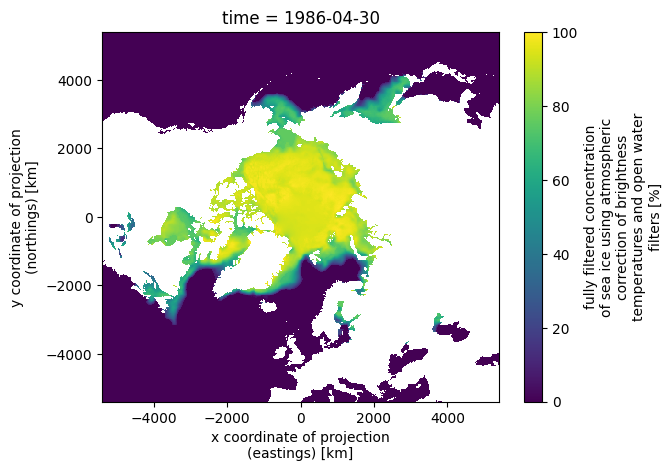

In [18]:
idx = 1
print(invalid_dates[idx])
ds.sel(time=pd.Timestamp(invalid_dates[idx])).siconca.plot()
print(int(ds.sel(time=pd.Timestamp(invalid_dates[idx])).siconca.notnull().sum().compute()), 
      int(ds.sel(time=pd.Timestamp(invalid_dates[idx])).siconca.isnull().sum().compute()))